## Analyse des données SOTER 

In [1]:
# Importations des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Importons le fichier contenant les données
data_sot=pd.read_excel("donnees soter.xlsx")

In [6]:
# data revue
data_sot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LNGI               342 non-null    float64
 1   LATI               342 non-null    float64
 2   PRID               418 non-null    object 
 3   Horizon            418 non-null    int64  
 4   Nom_horizon        148 non-null    object 
 5   epais_hor          416 non-null    float64
 6   transition_distin  120 non-null    object 
 7   Munshell_col_hud   282 non-null    object 
 8   sable_gros         255 non-null    float64
 9   sable_moy          98 non-null     float64
 10  sable_fin          253 non-null    float64
 11  sable_tr_fin       157 non-null    float64
 12  sable_total        302 non-null    float64
 13  Limon              299 non-null    float64
 14  Argile             300 non-null    float64
 15  classe_TT          297 non-null    object 
 16  PH                 326 non

In [7]:
# Voir les 6 premieres lignes de notre dataframe
data_sot.head()

,LNGI,LATI,PRID,Horizon,Nom_horizon,epais_hor,transition_distin,Munshell_col_hud,sable_gros,sable_moy,...,SO4,EXCA,EXMG,EXNA,EXCK,EXAL,CECS,total_carbone,total_azote,Phosphore
0,-16.315361,14.26786,SN002/KAL,1,NaN,13.0,C,10YR4/1,NaN,NaN,...,0.78,NaN,0.40,0.51,0.01,NaN,2.8,NaN,NaN,NaN
1,-16.315361,14.26786,SN002/KAL,2,NaN,24.0,G,10YR7/6,NaN,NaN,...,0.25,NaN,0.25,0.38,0.01,NaN,2.6,NaN,NaN,NaN
2,-16.315361,14.26786,SN002/KAL,3,NaN,36.0,C,10YR7/3,NaN,NaN,...,0.78,NaN,0.79,0.53,0.01,NaN,3.2,NaN,NaN,NaN
3,-16.315361,14.26786,SN002/KAL,4,NaN,110.0,NaN,10YR5/1,NaN,NaN,...,7.51,0.68,3.72,4.53,0.07,NaN,13.6,NaN,NaN,NaN
4,-15.992333,15.64472,SN008C/A001,1,Ap,6.0,NaN,10YR4/3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,0.22,6.0


In [9]:
sum(data_sot["sable_gros"].isnull())

163

In [12]:
len(data_sot["sable_gros"])
data_sot.columns

Index(['LNGI', 'LATI', 'PRID', 'Horizon', 'Nom_horizon', 'epais_hor',
       'transition_distin', 'Munshell_col_hud', 'sable_gros', 'sable_moy',
       'sable_fin', 'sable_tr_fin', 'sable_total', 'Limon', 'Argile',
       'classe_TT', 'PH', 'PHKC', 'SO4', 'EXCA', 'EXMG', 'EXNA', 'EXCK',
       'EXAL', 'CECS', 'total_carbone', 'total_azote', 'Phosphore'],
      dtype='object')

In [41]:
df=data_sot.drop(['PRID','Nom_horizon','transition_distin', 'Munshell_col_hud', 'Phosphore',"SO4" ,'sable_gros', 'sable_moy','sable_fin', 'sable_tr_fin','EXAL'],axis=1)

In [42]:
# Supprimer les nan sur la colonne "LNGI"
df=df[df['LNGI'].notnull()]

In [43]:
#Verification
sum(df['LNGI'].isnull())

0

In [44]:
df

,LNGI,LATI,Horizon,epais_hor,sable_total,Limon,Argile,classe_TT,PH,PHKC,EXCA,EXMG,EXNA,EXCK,CECS,total_carbone,total_azote
0,-16.315361,14.267860,1,13.0,86.0,8.0,3.0,S,3.61,3.41,NaN,0.40,0.51,0.01,2.8,NaN,NaN
1,-16.315361,14.267860,2,24.0,90.0,7.0,1.0,S,3.77,3.63,NaN,0.25,0.38,0.01,2.6,NaN,NaN
2,-16.315361,14.267860,3,36.0,85.0,7.0,4.0,LS,3.67,3.37,NaN,0.79,0.53,0.01,3.2,NaN,NaN
3,-16.315361,14.267860,4,110.0,43.0,37.0,20.0,L,3.06,2.85,0.68,3.72,4.53,0.07,13.6,NaN,NaN
4,-15.992333,15.644720,1,6.0,NaN,NaN,NaN,NaN,8.70,NaN,NaN,NaN,NaN,NaN,NaN,2.30,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,-14.562111,13.979940,5,120.0,53.0,15.0,32.0,SCL,5.30,NaN,1.60,1.10,0.07,0.09,13.6,NaN,NaN
414,-16.214975,14.201002,1,10.0,71.0,18.0,10.0,SL,7.50,6.30,0.37,0.15,1.20,0.06,NaN,4.85,0.43
415,-16.214975,14.201002,2,25.0,71.0,18.0,10.0,SL,7.50,6.30,0.37,0.15,1.20,0.06,NaN,4.85,0.43
416,-16.214975,14.201002,3,80.0,55.0,25.0,21.0,SCL,8.50,7.60,0.51,0.33,7.61,0.07,NaN,1.37,0.10


In [107]:
df1=df.drop(["LNGI","LATI"],axis=1)

In [116]:
df2=df1.groupby(by="Horizon").std()

In [117]:
df2

,epais_hor,sable_total,Limon,Argile,PH,PHKC,EXCA,EXMG,EXNA,EXCK,CECS,total_carbone,total_azote
Horizon,,,,,,,,,,,,,
1,13.027734,24.131499,14.898387,11.763760,1.174991,0.634055,5.402165,14.002635,5.234213,0.344139,7.346952,7.820708,0.640517
2,23.495744,25.204005,13.071233,14.541580,1.222487,0.696481,7.117365,2.156650,0.702774,0.281306,39.352821,8.081673,0.511426
3,32.688848,24.035584,12.850964,14.646069,1.239563,0.830593,4.242953,2.044125,1.358882,0.369430,184.983898,6.888058,0.893295
4,38.226961,22.318321,12.498757,12.795361,1.498587,1.173820,5.383169,2.301414,1.841196,0.366564,9.178325,3.660212,0.165549
5,37.178616,23.642758,14.728361,13.634346,1.495313,0.543139,5.632756,1.419411,1.964722,0.267396,7.141726,8.900581,0.285984
6,21.146053,25.410628,22.609732,11.738824,1.857418,0.777818,0.898610,1.815845,0.729315,0.319635,13.717531,0.989950,0.120208
7,33.234019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df["classe_TT"].value_counts()

S       76
SL      47
SCL     40
LS      38
C       18
CL      15
L        9
SICL     8
SC       6
SIC      3
SIL      3
SI       2
Name: classe_TT, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pc\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([51., 68., 39., 26., 26., 23., 17.,  7.,  3.,  6.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <a list of 10 Patch objects>)

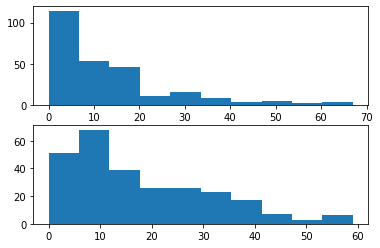

In [119]:
fig,axes= plt.subplots(nrows=2,ncols=1)
axes[0].hist(df['Limon'])
axes[1].hist(df['Argile'])

In [79]:
import seaborn as sns

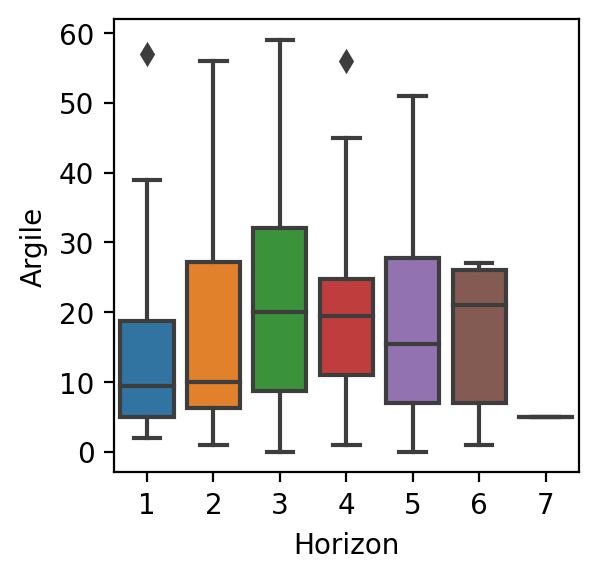

In [86]:
fig=plt.figure(dpi=200,figsize=(3,3))
sns.boxplot(y="Argile",x="Horizon",data=df1)

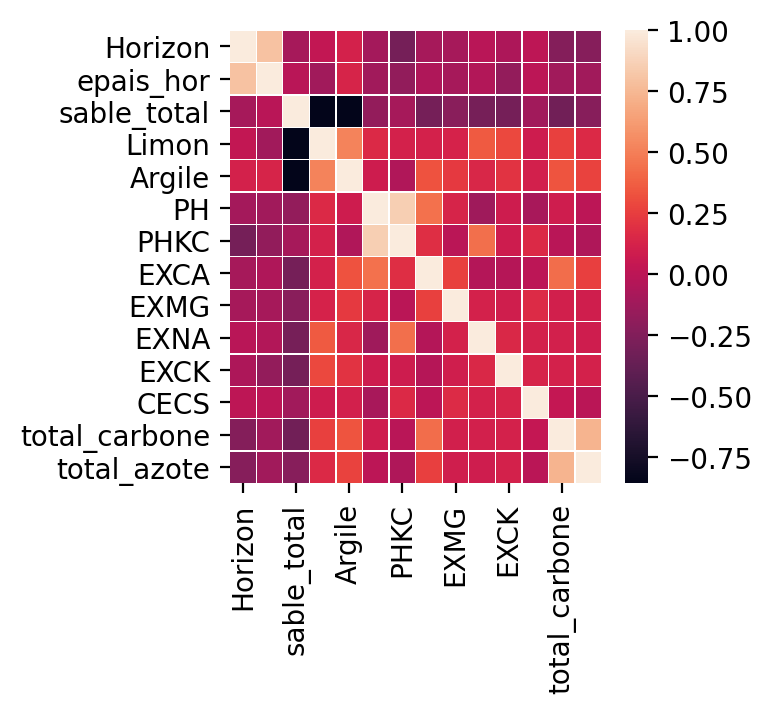

In [123]:
fig=plt.figure(dpi=200,figsize=(3,3))
sns.heatmap(df1.corr(),linewidths=0.1)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

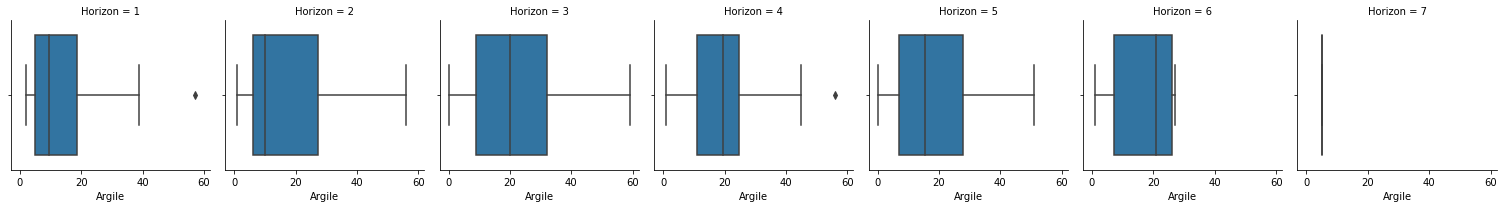

In [106]:
fig=plt.figure(dpi=200)
sns.axes_style(style='whitegrid')
p=sns.FacetGrid(df1,col="Horizon")
p.map(sns.boxplot,"Argile")
fig

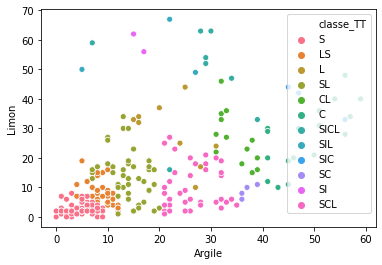

In [122]:

sns.scatterplot(data=df1,x="Argile",y="Limon",hue="classe_TT")

In [134]:
from sklearn.model_selection import train_test_split

In [137]:
from sklearn.linear_model import LinearRegression

In [161]:
mod=LinearRegression()

In [202]:
df3=df1.drop(["classe_TT","Horizon"],axis=1)
df3=df3.dropna()


In [200]:
df3=df3[df3.notna()]

In [203]:
df3

,epais_hor,sable_total,Limon,Argile,PH,PHKC,EXCA,EXMG,EXNA,EXCK,CECS,total_carbone,total_azote
17,28.0,88.0,5.0,6.0,6.30,4.90,1.58,0.58,0.02,0.04,2.50,1.8,0.14
29,40.0,93.0,3.0,4.0,5.10,4.20,0.23,0.07,0.01,0.03,1.40,1.2,0.13
32,26.0,90.0,5.0,5.0,6.70,5.60,1.11,0.53,0.02,0.08,2.35,1.5,0.17
203,23.0,75.0,17.0,8.0,6.00,5.30,1.80,0.60,0.04,0.10,10.70,5.5,0.37
204,82.0,73.0,13.0,16.0,5.80,5.00,1.90,0.70,0.03,0.08,3.75,4.2,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,55.0,91.0,2.0,6.0,4.70,4.50,0.84,0.36,0.15,0.14,2.76,3.7,0.37
372,100.0,90.0,2.0,7.0,4.55,4.45,0.62,0.20,0.14,0.13,2.16,2.0,0.20
374,15.0,89.0,6.0,5.0,5.60,4.80,1.76,0.67,0.15,0.14,4.26,7.7,0.56
375,50.0,85.0,5.0,10.0,4.35,4.15,0.48,0.26,0.14,0.12,3.00,3.1,0.34


In [204]:
X=df3.drop("PH",axis=1)
y=df3["PH"]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [206]:
X_train


,epais_hor,sable_total,Limon,Argile,PHKC,EXCA,EXMG,EXNA,EXCK,CECS,total_carbone,total_azote
240,20.0,95.0,2.0,3.0,4.40,0.700000,0.20,0.006,0.04,1.750000,2.240000,0.19
356,55.0,90.0,2.0,8.0,4.40,5.000000,1.86,0.120,0.13,8.300000,3.400000,0.32
331,100.0,65.0,5.0,31.0,4.80,7.150000,0.70,0.120,0.13,9.900000,4.000000,0.31
325,25.0,90.0,7.0,6.0,5.70,4.250000,1.14,0.100,0.13,5.940000,8.300000,0.68
327,110.0,84.0,3.0,12.0,4.55,1.340000,0.51,0.110,0.10,3.250000,2.800000,0.25
254,48.0,82.0,12.0,6.0,4.30,0.600000,1.40,0.000,0.05,2.750000,0.600000,0.08
359,15.0,74.0,15.0,11.0,4.45,2.000000,1.87,0.150,0.16,5.160000,9.300000,0.85
315,60.0,58.0,6.0,36.0,4.95,18.200001,1.10,0.190,0.13,22.850000,6.200000,0.45
291,12.0,88.0,5.0,7.0,4.60,1.880000,0.80,0.160,0.13,5.100000,9.300000,0.59
314,14.0,66.0,9.0,25.0,5.45,19.600000,2.72,0.160,0.23,24.799999,18.099998,1.20


In [207]:
mod.fit(X_train,y_train)

LinearRegression()

In [158]:

LinearRegression()


LinearRegression()

In [208]:
y_pred=mod.predict(X_train)

In [209]:
from sklearn.metrics import mean_squared_error

In [210]:
mean_squared_error(y_train,y_pred)

0.29417663267012506

In [211]:
mod.intercept_

12.060090945822552

In [212]:
mod.coef_


array([-2.14987012e-03, -1.20646383e-01, -1.26350789e-01, -9.84940406e-02,
        1.26271715e+00,  2.72589535e-02,  3.40433365e-01, -1.79585033e-01,
       -5.73031948e+00, -3.72560388e-03, -6.08056162e-02, -2.34443946e-02])